In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
first_dataset = pd.read_csv('dataset.csv')
first_dataset.head(10)

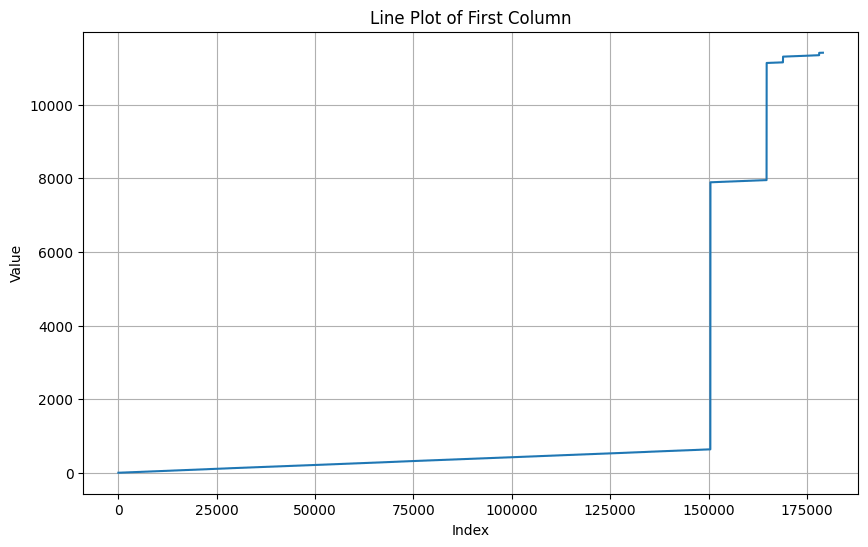

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(first_dataset.iloc[:, 0])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of First Column')
plt.grid(True)
plt.show()

In [ ]:
second_dataset = pd.read_csv('IPL Matches 2008-2020.csv')
second_dataset.head()

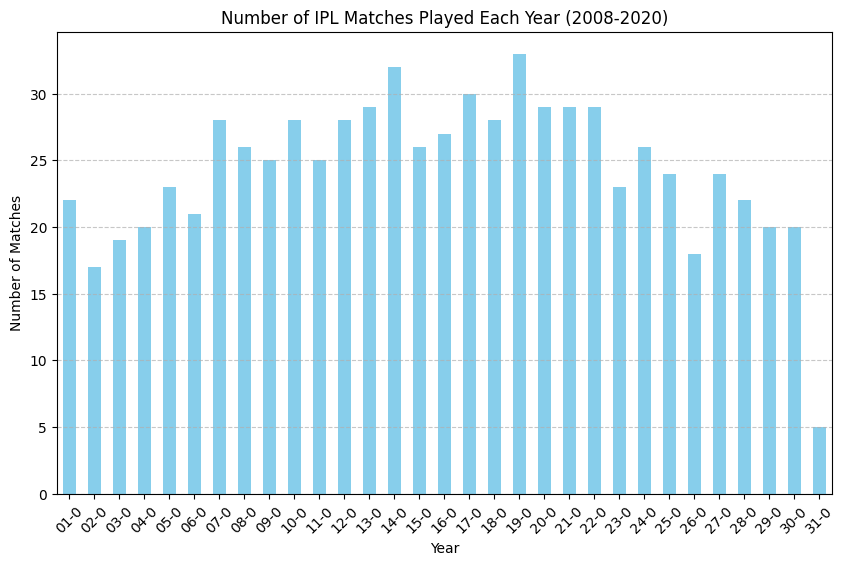

In [56]:
import matplotlib.pyplot as plt

# Counting the number of matches played each year
matches_per_year = second_dataset['date'].str[:4].value_counts().sort_index()

# Plotting the number of matches per year
plt.figure(figsize=(10, 6))
matches_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.title('Number of IPL Matches Played Each Year (2008-2020)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
total_runs = first_dataset.groupby(['match_id','inning']).sum()['total_runs'].add(1).reset_index()
total_runs

In [6]:
total_runs = total_runs[total_runs['inning']==1]

In [ ]:
total_runs

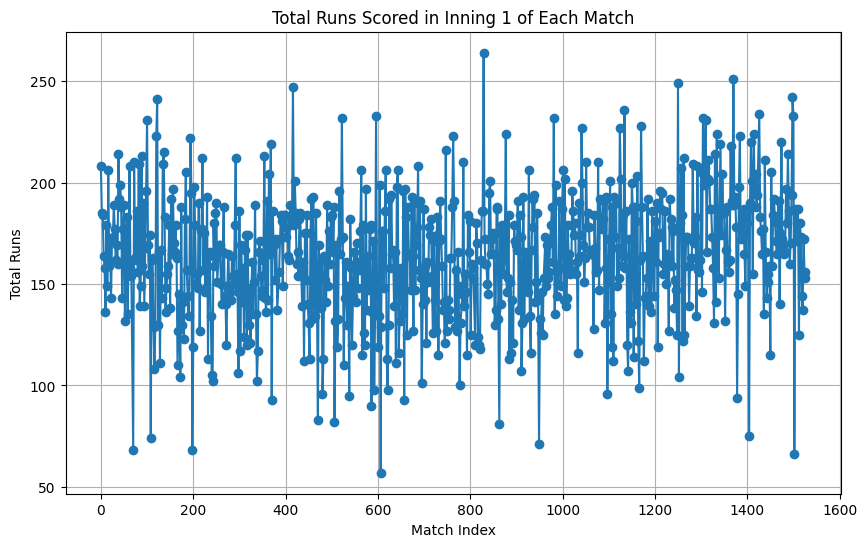

In [58]:
import matplotlib.pyplot as plt

# Filter total_runs DataFrame for inning 1
inning1_total_runs = total_runs[total_runs['inning'] == 1]

# Plotting the total runs scored in inning 1 of each match
plt.figure(figsize=(10, 6))
plt.plot(inning1_total_runs.index, inning1_total_runs['total_runs'], marker='o', linestyle='-')
plt.xlabel('Match Index')
plt.ylabel('Total Runs')
plt.title('Total Runs Scored in Inning 1 of Each Match')
plt.grid(True)
plt.show()

In [8]:
match_df = second_dataset.merge(total_runs[['match_id','total_runs']],left_on='id',right_on='match_id')

In [9]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


In [10]:
match_df['team1'].value_counts()

team1
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: count, dtype: int64

In [11]:
match_df['team1'] = match_df['team1'].replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].replace('Deccan Chargers','Sunrisers Hyderabad')


In [ ]:
teams = ['Kolkata Knight Riders', 
         'Chennai Super Kings',
         'Kings XI Punjab', 
         'Rajasthan Royals',
         'Mumbai Indians',
         'Delhi Capitals',
         'Royal Challengers Bangalore',
         'Sunrisers Hyderabad']

In [ ]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [14]:
match_df['team1'].value_counts()

team1
Sunrisers Hyderabad            97
Mumbai Indians                 92
Kings XI Punjab                83
Chennai Super Kings            83
Royal Challengers Bangalore    76
Kolkata Knight Riders          76
Delhi Capitals                 70
Rajasthan Royals               64
Name: count, dtype: int64

In [15]:
match_df['team2'].value_counts()

team2
Delhi Capitals                 91
Royal Challengers Bangalore    88
Kolkata Knight Riders          87
Mumbai Indians                 78
Kings XI Punjab                78
Rajasthan Royals               76
Chennai Super Kings            73
Sunrisers Hyderabad            70
Name: count, dtype: int64

In [16]:
match_df.shape

(641, 20)

In [17]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


In [18]:
match_df = match_df[['id','city','winner','total_runs']]

In [19]:
match_df = match_df.rename(columns={'id':'match_id'})

In [20]:
second_innings = match_df.merge(first_dataset,on='match_id')
second_innings

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152054,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
152055,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
152056,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
152057,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [21]:
second_innings = second_innings[second_innings['inning']==2]
second_innings.shape

(73304, 24)

In [22]:
second_innings['batting_team'] = second_innings['batting_team'].replace('Delhi Daredevils','Delhi Capitals')
second_innings['bowling_team'] = second_innings['bowling_team'].replace('Delhi Daredevils','Delhi Capitals')

second_innings['batting_team'] = second_innings['batting_team'].replace('Deccan Chargers','Sunrisers Hyderabad')
second_innings['bowling_team'] = second_innings['bowling_team'].replace('Deccan Chargers','Sunrisers Hyderabad')

In [23]:
second_innings['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Delhi Capitals', 'Mumbai Indians',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Rajasthan Royals', 'Chennai Super Kings'], dtype=object)

In [24]:
# Convert 'total_runs_y' column to numeric dtype
second_innings['total_runs_y'] = second_innings['total_runs_y'].astype(int)

# Apply cumsum function after converting dtype
second_innings['current_Score'] = second_innings.groupby('match_id')['total_runs_y'].cumsum()

# Display the DataFrame
second_innings


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_Score
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152054,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
152055,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
152056,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
152057,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [25]:
second_innings['runs_left'] = second_innings['total_runs_x'] - second_innings['current_Score']
second_innings

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_Score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152054,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,1
152055,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-1
152056,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-2
152057,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-4


In [26]:
#calculating ball left each ball is thrown using formula
second_innings['balls_left'] = 126 - (second_innings['over']*6 +second_innings['ball'])
second_innings

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_Score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152054,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
152055,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
152056,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
152057,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


## Getting wickets

In [27]:
# Convert 'player_dismissed' column to numeric dtype
second_innings['player_dismissed'] = second_innings['player_dismissed'].apply(lambda x: 0 if x == "0" else 1)
second_innings['player_dismissed'] = second_innings['player_dismissed'].astype(int)

# Apply cumsum function after converting dtype
wickets = second_innings.groupby('match_id')['player_dismissed'].cumsum()

# Calculate remaining wickets
second_innings['wickets_remaining'] = 10 - wickets

# Display the DataFrame
second_innings


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_Score,runs_left,balls_left,wickets_remaining
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,1,NaN,NaN,1,207,119,9
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,1,NaN,NaN,1,207,118,8
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,1,NaN,NaN,1,207,117,7
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,1,NaN,NaN,3,205,116,6
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,1,NaN,NaN,7,201,115,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152054,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,1,NaN,NaN,152,1,4,-110
152055,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,1,NaN,NaN,154,-1,3,-111
152056,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-2,2,-112
152057,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,1,NaN,NaN,157,-4,1,-113


### Current Run Rate

In [28]:
second_innings['crr'] = round((second_innings['current_Score']*6)/(120 - second_innings['balls_left']),2)
second_innings

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_Score,runs_left,balls_left,wickets_remaining,crr
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,1,NaN,NaN,1,207,119,9,6.00
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,1,NaN,NaN,1,207,118,8,3.00
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,1,NaN,NaN,1,207,117,7,2.00
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,1,NaN,NaN,3,205,116,6,4.50
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,1,NaN,NaN,7,201,115,5,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152054,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,1,NaN,NaN,152,1,4,-110,7.86
152055,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,1,NaN,NaN,154,-1,3,-111,7.90
152056,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,1,run out,KH Pandya,155,-2,2,-112,7.88
152057,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,1,NaN,NaN,157,-4,1,-113,7.92


### Required Run Rate

In [29]:
second_innings['rrr'] = round((second_innings['runs_left']*6)/(second_innings['balls_left']),2)
second_innings

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_Score,runs_left,balls_left,wickets_remaining,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,1,NaN,NaN,1,207,119,9,6.00,10.44
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,1,NaN,NaN,1,207,118,8,3.00,10.53
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,1,NaN,NaN,1,207,117,7,2.00,10.62
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,1,NaN,NaN,3,205,116,6,4.50,10.60
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,1,NaN,NaN,7,201,115,5,8.40,10.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152054,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,1,NaN,NaN,152,1,4,-110,7.86,1.50
152055,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,1,NaN,NaN,154,-1,3,-111,7.90,-2.00
152056,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-2,2,-112,7.88,-6.00
152057,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,1,NaN,NaN,157,-4,1,-113,7.92,-24.00


### finding winner 

In [30]:
def winner(team):
    return 1 if team['batting_team'] == team['winner'] else 0

In [31]:
second_innings['results'] = second_innings.apply(winner,axis=1)
second_innings.sample()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_Score,runs_left,balls_left,wickets_remaining,crr,rrr,results
46619,225,Dharamsala,Deccan Chargers,175,2,Sunrisers Hyderabad,Kings XI Punjab,15,1,A Symonds,...,1,NaN,NaN,124,51,35,-79,8.75,8.74,0


### Only Taking required columns

In [32]:
required_data = second_innings[['batting_team', 'bowling_team', 'city','runs_left', 'balls_left', 'wickets_remaining', 'total_runs_x', 'results']]
required_data


,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,total_runs_x,results
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,9,208,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,8,208,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,7,208,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,6,208,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,5,208,0
...,...,...,...,...,...,...,...,...
152054,Chennai Super Kings,Mumbai Indians,Hyderabad,1,4,-110,153,0
152055,Chennai Super Kings,Mumbai Indians,Hyderabad,-1,3,-111,153,0
152056,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,2,-112,153,0
152057,Chennai Super Kings,Mumbai Indians,Hyderabad,-4,1,-113,153,0


### Sampling Data

In [33]:
final_data = required_data.sample(required_data.shape[0])

### Dropping NUll Values

In [34]:
final_data.dropna(inplace=True)

Removing rows where balls_left==0 to remove -inf and inf from rrr column

In [35]:
final_data = final_data[final_data['balls_left'] != 0]

### Storing data in new csv

In [36]:
final_data.to_csv("final_data.csv", index=False)

### Building Model

In [37]:
from sklearn.model_selection import train_test_split as tts

In [38]:
x = final_data.iloc[:, :-1]
y = final_data.iloc[:,-1]

In [39]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.25,random_state=100)
x_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,total_runs_x
60023,Delhi Capitals,Kolkata Knight Riders,Kolkata,72,102,-9,98
130294,Kolkata Knight Riders,Royal Challengers Bangalore,Bengaluru,65,41,-74,186
86659,Chennai Super Kings,Royal Challengers Bangalore,Bangalore,78,96,-15,107
74310,Delhi Capitals,Rajasthan Royals,Delhi,14,10,-105,166
22051,Royal Challengers Bangalore,Sunrisers Hyderabad,Cape Town,124,59,-54,185
...,...,...,...,...,...,...,...
83814,Rajasthan Royals,Kings XI Punjab,Chandigarh,142,118,8,146
56884,Delhi Capitals,Chennai Super Kings,Chennai,37,8,-106,177
66999,Kolkata Knight Riders,Chennai Super Kings,Chennai,89,74,-42,140
92993,Mumbai Indians,Kings XI Punjab,Mumbai,165,119,9,169


In [40]:
x_test

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,total_runs_x
96167,Rajasthan Royals,Royal Challengers Bangalore,Bangalore,73,31,-80,191
47588,Delhi Capitals,Sunrisers Hyderabad,Delhi,55,26,-86,146
32541,Royal Challengers Bangalore,Delhi Capitals,Johannesburg,77,59,-51,135
128344,Rajasthan Royals,Mumbai Indians,Jaipur,60,38,-76,173
125248,Royal Challengers Bangalore,Kings XI Punjab,Bengaluru,41,22,-89,162
...,...,...,...,...,...,...,...
71141,Mumbai Indians,Kolkata Knight Riders,Mumbai,64,33,-79,141
133115,Kolkata Knight Riders,Mumbai Indians,Kolkata,169,80,-30,218
17769,Rajasthan Royals,Kolkata Knight Riders,Kolkata,4,20,-91,148
62458,Kolkata Knight Riders,Rajasthan Royals,Kolkata,35,28,-86,132


In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf = ColumnTransformer([
    ('trf', OneHotEncoder(drop='first'), ['batting_team', 'bowling_team', 'city'])
],
remainder='passthrough')


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])


In [43]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [44]:
y_pred = pipe.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8008195359654466

In [46]:
pipe.predict_proba(x_test)[0]

array([0.51430537, 0.48569463])

In [47]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [48]:
final_data['city'].unique()

array(['Mumbai', 'Port Elizabeth', 'Indore', 'Bangalore', 'Chennai',
       'Kolkata', 'Chandigarh', 'Delhi', 'Ahmedabad', 'Johannesburg',
       'Abu Dhabi', 'Mohali', 'Hyderabad', 'Cape Town', 'Centurion',
       'Nagpur', 'Visakhapatnam', 'Dharamsala', 'Ranchi', 'Bengaluru',
       'Pune', 'Cuttack', 'Jaipur', 'Sharjah', 'Durban', 'Raipur',
       'Kimberley', 'Bloemfontein', 'East London'], dtype=object)

## Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

trf = ColumnTransformer([
    ('trf', OneHotEncoder(drop='first'), ['batting_team', 'bowling_team', 'city'])
],
remainder='passthrough')

pipe = Pipeline([
    ('step1', trf),
    ('step2', RandomForestClassifier())
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

accuracy_score(y_test, y_pred)


In [ ]:
pipe.predict_proba(x_test)[0]

In [ ]:
pickle.dump(pipe,open('pipe2.pkl','wb'))